
# NLP Analyses of the "PREFIX," "project location," and "type of work" 
Looking at the frequency of projects using NLP, where the projects are and the types. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [7]:
df = pd.read_csv('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/clean_obligated_waiting.csv', low_memory=False)


In [8]:
df.head()

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True
1,1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,8,False
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
3,3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244,True
4,4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214,True


In [9]:
df_text = df[['agency', 'project_location', 'type_of_work']].copy()

In [10]:
df_text.sample(5)

,agency,project_location,type_of_work
176,Firebaugh,"Dunkle Park, River Lane And 12th Street Facili...","Construct Sidewalk, Curb & Gutter. (tc)"
905,Sanger,Bethel Ave. Between North Ave. And Annadale Ave.,"Construct Sidewalk, Curb And Gutter And Instal..."
17366,Riverside County,Magnolia Avenue At The Bnsf Railroad Tracks Fr...,New Overhead
4058,San Francisco County,Balboa St (from 34th Ave. To 39th Ave.),Street Improvements
8927,Clovis,Intersection Of Peach Ave And Gettysburg Ave,Upgrade Traffic Signal


In [11]:
df_text.dtypes

agency              object
project_location    object
type_of_work        object
dtype: object

In [12]:
len(df_text)

20117

## Installing text analysis tools

code help: 
* https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb
* https://github.com/UCLALuskinDataScience/UrbanDataScience/blob/main/weeks5-6/a.%20NLP%20Part%201.ipynb

In [19]:
#!pip install nltk
#! pip install textblob
#! pip install wordcloud

In [20]:
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [22]:
import re

In [23]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Type of work

In [ ]:
#df_work_text = df_text[['type_of_work']]

## Creating a list for analysis

In [24]:
#df_work_text = df_text[['type_of_work']]

In [25]:
#df_work_text

In [26]:
#work_text = df_work_text.squeeze()

In [27]:
#print(work_text)

In [28]:
#type(work_text)

In [29]:
#work_list = work_text.tolist() 

In [30]:
#work_list = ' '.join(work_list).lower()

In [31]:
#work_list[100:1100]

In [32]:
#swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]

In [33]:
#clean_work_list = [word for word in word_tokenize(work_list.lower()) if word not in swords] 

In [34]:
#clean_work_list

In [35]:
#len(set(clean_work_list))

In [36]:
#clean_work_list.count('bridge')

In [37]:
#clean_work_list.count('restoration')

In [38]:
#clean_word_list_df = pd.DataFrame(np.array(clean_work_list))

In [39]:
#clean_word_list_df.rename(columns={'0':'words'}, inplace=True)

In [40]:
#clean_word_list_df.value_counts()

In [41]:
#! pip install gensim
#! pip install pyLDAvis

In [42]:
#import gensim
#import pyLDAvis
#import pyLDAvis.gensim_models

In [43]:
#dictionary = gensim.corpora.Dictionary(clean_work_list)
#corpus = [dictionary.doc2bow(wl) for wl in clean_work_list]
#model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, alpha = 0.9, eta=0.9)

In [90]:
#work_wordcloud = WordCloud(stopwords = STOPWORDS,
                      #collocations=True, background_color='white').generate(work_words_only)

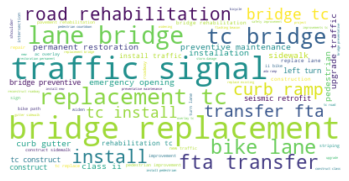

In [91]:
#plt.imshow(work_wordcloud, interpolation='bilInear')
#plt.axis('off')
#plt.show()
